### Project Overview: Financial Time Series Analysis of Global Bank Exposure

**Objective:**  
The objective of this project is to analyze the financial exposure of various countries over time using the BIS global banking dataset. The dataset contains quarterly financial data reported by multiple countries, such as the value of outstanding stocks and other financial indicators. We aim to conduct a thorough time series analysis of financial exposure, focusing on specific countries and applying different time series models to forecast future trends.


**Load the Data**  
The dataset contains 159 columns, including financial measures and quarterly data from different countries.

In [32]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('./BIS_global_banks.csv')


In [33]:
# Display column names
print("Column names:")
print(data.columns)

# Preview the first five rows of the data
print("\nFirst five rows of data:")
print(data.head())

# Display data type information
print("\nData type information:")
print(data.info())


Column names:
Index(['FREQ', 'Frequency', 'L_MEASURE', 'Measure', 'L_REP_CTY',
       'Reporting country', 'CBS_BANK_TYPE', 'CBS bank type', 'CBS_BASIS',
       'CBS reporting basis',
       ...
       '2021-Q4', '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4', '2023-Q1',
       '2023-Q2', '2023-Q3', '2023-Q4', '2024-Q1'],
      dtype='object', length=159)

First five rows of data:
  FREQ  Frequency L_MEASURE                       Measure L_REP_CTY  \
0    Q  Quarterly         S  Amounts outstanding / Stocks        TR   
1    Q  Quarterly         S  Amounts outstanding / Stocks        NO   
2    Q  Quarterly         S  Amounts outstanding / Stocks        NO   
3    Q  Quarterly         S  Amounts outstanding / Stocks        NO   
4    Q  Quarterly         S  Amounts outstanding / Stocks        NO   

  Reporting country CBS_BANK_TYPE  \
0           Türkiye            4B   
1            Norway            4O   
2            Norway            4O   
3            Norway            4O   
4       

**Identify Reporting Countries**  
Extract the list of unique countries that are reporting data. This helps us understand the geographical coverage of the dataset and decide which countries' data to focus on for the time series analysis.
    
    

In [34]:
unique_countries = data['Reporting country'].unique()
print(f"Number of unique countries: {len(unique_countries)}")


print("List of countries:")
for country in unique_countries:
    print(country)
    
    

Number of unique countries: 32
List of countries:
Türkiye
Norway
Canada
Finland
Australia
Japan
Mexico
Denmark
Belgium
Brazil
Germany
Portugal
Korea
France
Sweden
Italy
All reporting countries
United States
Greece
India
Austria
United Kingdom
Ireland
Netherlands
Spain
Hong Kong SAR
Panama
Singapore
Chinese Taipei
Luxembourg
Switzerland
Chile


**Check for Missing Values**  
   Since financial data is often incomplete, you need to inspect and handle missing values, especially in the `Value` columns corresponding to different quarters. Options include:
   - **Filling missing values**: Using forward-fill, backward-fill, or interpolation methods.
   - **Removing rows with missing values**: Only if the proportion of missing data is small.


In [35]:
# Check for Missing Values 
missing_data = data.isnull().sum()

data.fillna(method='ffill', inplace=True)


/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_11201/599221741.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [36]:
import pandas as pd

# Select columns that represent time (those containing '-')
time_columns = [col for col in data.columns if '-' in col]

# Reshape the data to long format
data_long = pd.melt(data,
                    id_vars=['FREQ', 'Frequency', 'L_MEASURE', 'Measure', 'L_REP_CTY', 'Reporting country', 
                             'CBS_BANK_TYPE', 'CBS bank type', 'CBS_BASIS', 'CBS reporting basis'],
                    value_vars=time_columns,
                    var_name='Quarter',
                    value_name='Value')

# Drop rows where 'Value' is NaN
data_long_clean = data_long.dropna(subset=['Value'])
data_long_clean['Quarter'] = pd.PeriodIndex(data_long_clean['Quarter'], freq='Q').to_timestamp()


# Check the cleaned and transformed data
print(data_long_clean.head())

     FREQ  Frequency L_MEASURE                       Measure L_REP_CTY  \
3781    Q  Quarterly         S  Amounts outstanding / Stocks        5A   
3782    Q  Quarterly         S  Amounts outstanding / Stocks        5A   
3783    Q  Quarterly         S  Amounts outstanding / Stocks        US   
3784    Q  Quarterly         S  Amounts outstanding / Stocks        5A   
3785    Q  Quarterly         S  Amounts outstanding / Stocks        US   

            Reporting country CBS_BANK_TYPE  \
3781  All reporting countries            4O   
3782  All reporting countries            4O   
3783            United States            4R   
3784  All reporting countries            4O   
3785            United States            4R   

                                          CBS bank type CBS_BASIS  \
3781  All excluding 4C banks, excl. domestic positio...         F   
3782  All excluding 4C banks, excl. domestic positio...         F   
3783       Domestic banks(4B), excl. domestic positions         O

/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_11201/2565695147.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long_clean['Quarter'] = pd.PeriodIndex(data_long_clean['Quarter'], freq='Q').to_timestamp()


In [37]:
# Display data type information
print("\nData type information:")
print(data_long_clean.info())


Data type information:
<class 'pandas.core.frame.DataFrame'>
Index: 28236323 entries, 3781 to 28283449
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FREQ                 object        
 1   Frequency            object        
 2   L_MEASURE            object        
 3   Measure              object        
 4   L_REP_CTY            object        
 5   Reporting country    object        
 6   CBS_BANK_TYPE        object        
 7   CBS bank type        object        
 8   CBS_BASIS            object        
 9   CBS reporting basis  object        
 10  Quarter              datetime64[ns]
 11  Value                float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 2.7+ GB
None


In [38]:


# Now, the 'Quarter' column should be in datetime64[ns] format and ready for plotting and analysis
print(data_long_clean.info())


<class 'pandas.core.frame.DataFrame'>
Index: 28236323 entries, 3781 to 28283449
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FREQ                 object        
 1   Frequency            object        
 2   L_MEASURE            object        
 3   Measure              object        
 4   L_REP_CTY            object        
 5   Reporting country    object        
 6   CBS_BANK_TYPE        object        
 7   CBS bank type        object        
 8   CBS_BASIS            object        
 9   CBS reporting basis  object        
 10  Quarter              datetime64[ns]
 11  Value                float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 2.7+ GB
None


In [39]:
# Step 1: Filter data for the United States

usa_data = data_long_clean[data_long_clean['Reporting country'] == 'United States']

# Step 2: Identify unique CBS bank types
unique_bank_types = usa_data['CBS_BANK_TYPE'].unique()
print(f"Unique CBS Bank Types for United States: {unique_bank_types}")
print(f"Total Number of Unique CBS Bank Types: {len(unique_bank_types)}")




Unique CBS Bank Types for United States: ['4R' '4O' '4B' '4M' '4C']
Total Number of Unique CBS Bank Types: 5


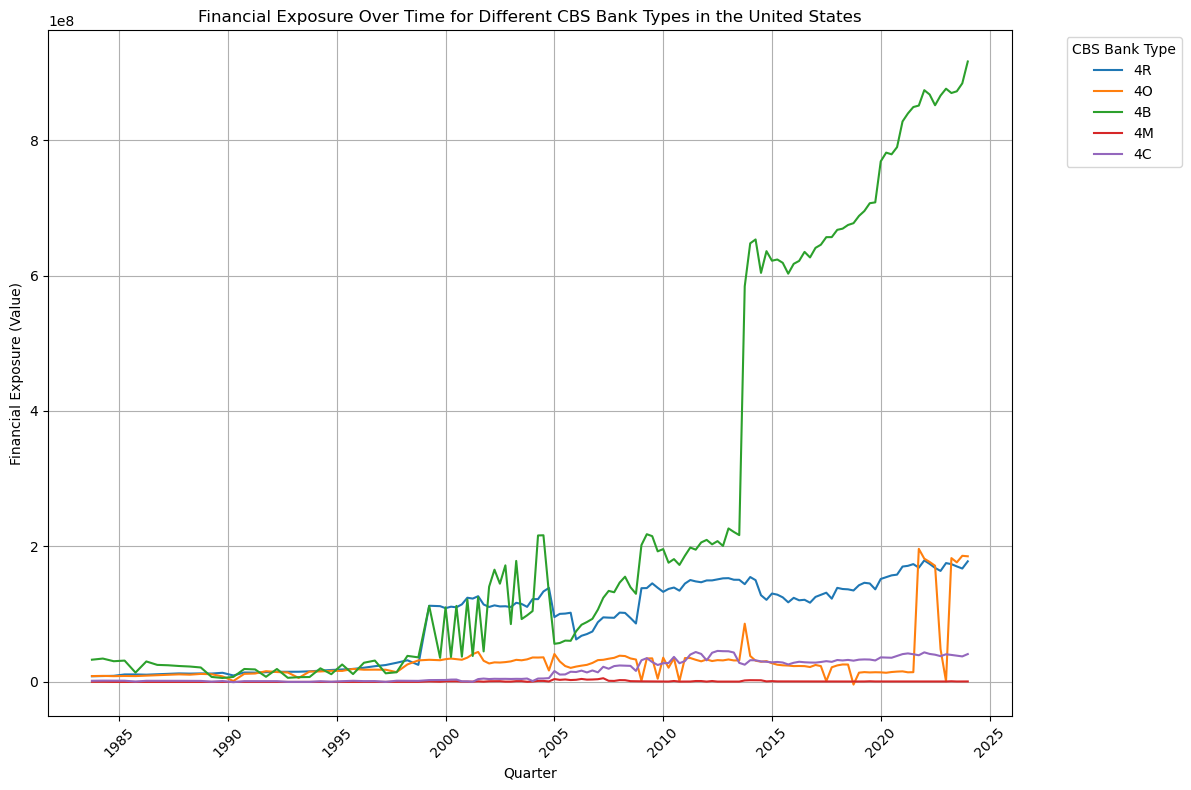

In [40]:
# Step 3: Time Series Visualization for Each CBS Bank Type
plt.figure(figsize=(12, 8))

for bank_type in unique_bank_types:
    # Filter data for each bank type
    bank_data = usa_data[usa_data['CBS_BANK_TYPE'] == bank_type]
    
    # Group by 'Quarter' and aggregate the 'Value' column
    bank_data_grouped = bank_data.groupby('Quarter')['Value'].sum()
    
    # Plot the time series for each bank type
    plt.plot(bank_data_grouped.index, bank_data_grouped, label=f'{bank_type}')
    
# Plot settings
plt.title('Financial Exposure Over Time for Different CBS Bank Types in the United States')
plt.xlabel('Quarter')
plt.ylabel('Financial Exposure (Value)')
plt.legend(title='CBS Bank Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Report: Time Series Analysis of Financial Exposure in the United States by CBS Bank Type

1. **Data Filtering:**
   The dataset was filtered to focus exclusively on financial data related to the United States. This allows for a more precise time series analysis specific to the country's financial sector.

2. **Identifying Unique Bank Types:**
   The unique categories of banks, as represented by the `CBS_BANK_TYPE` variable, were identified. 

3. **Aggregating Financial Exposure by Quarter:**
   Financial exposure data for each unique bank type was grouped by quarter and aggregated. This process enables the observation of trends and patterns in financial exposure over time for each category of banks.

4. **Time Series Visualization:**
   Time series plots were created to visualize the financial exposure over time for each bank type. These visualizations reveal trends, fluctuations, and patterns, providing insights into the temporal behavior of financial exposure for different types of banks within the United States.


Unique CBS Bank Types and Descriptions for United States:
      CBS_BANK_TYPE                                      CBS bank type
3783             4R       Domestic banks(4B), excl. domestic positions
4966             4O  All excluding 4C banks, excl. domestic positio...
11439            4B                                     Domestic banks
13914            4M                       All banks (=4B +4C + 4D +4E)
16771            4C  Inside-area foreign banks consolidated by thei...


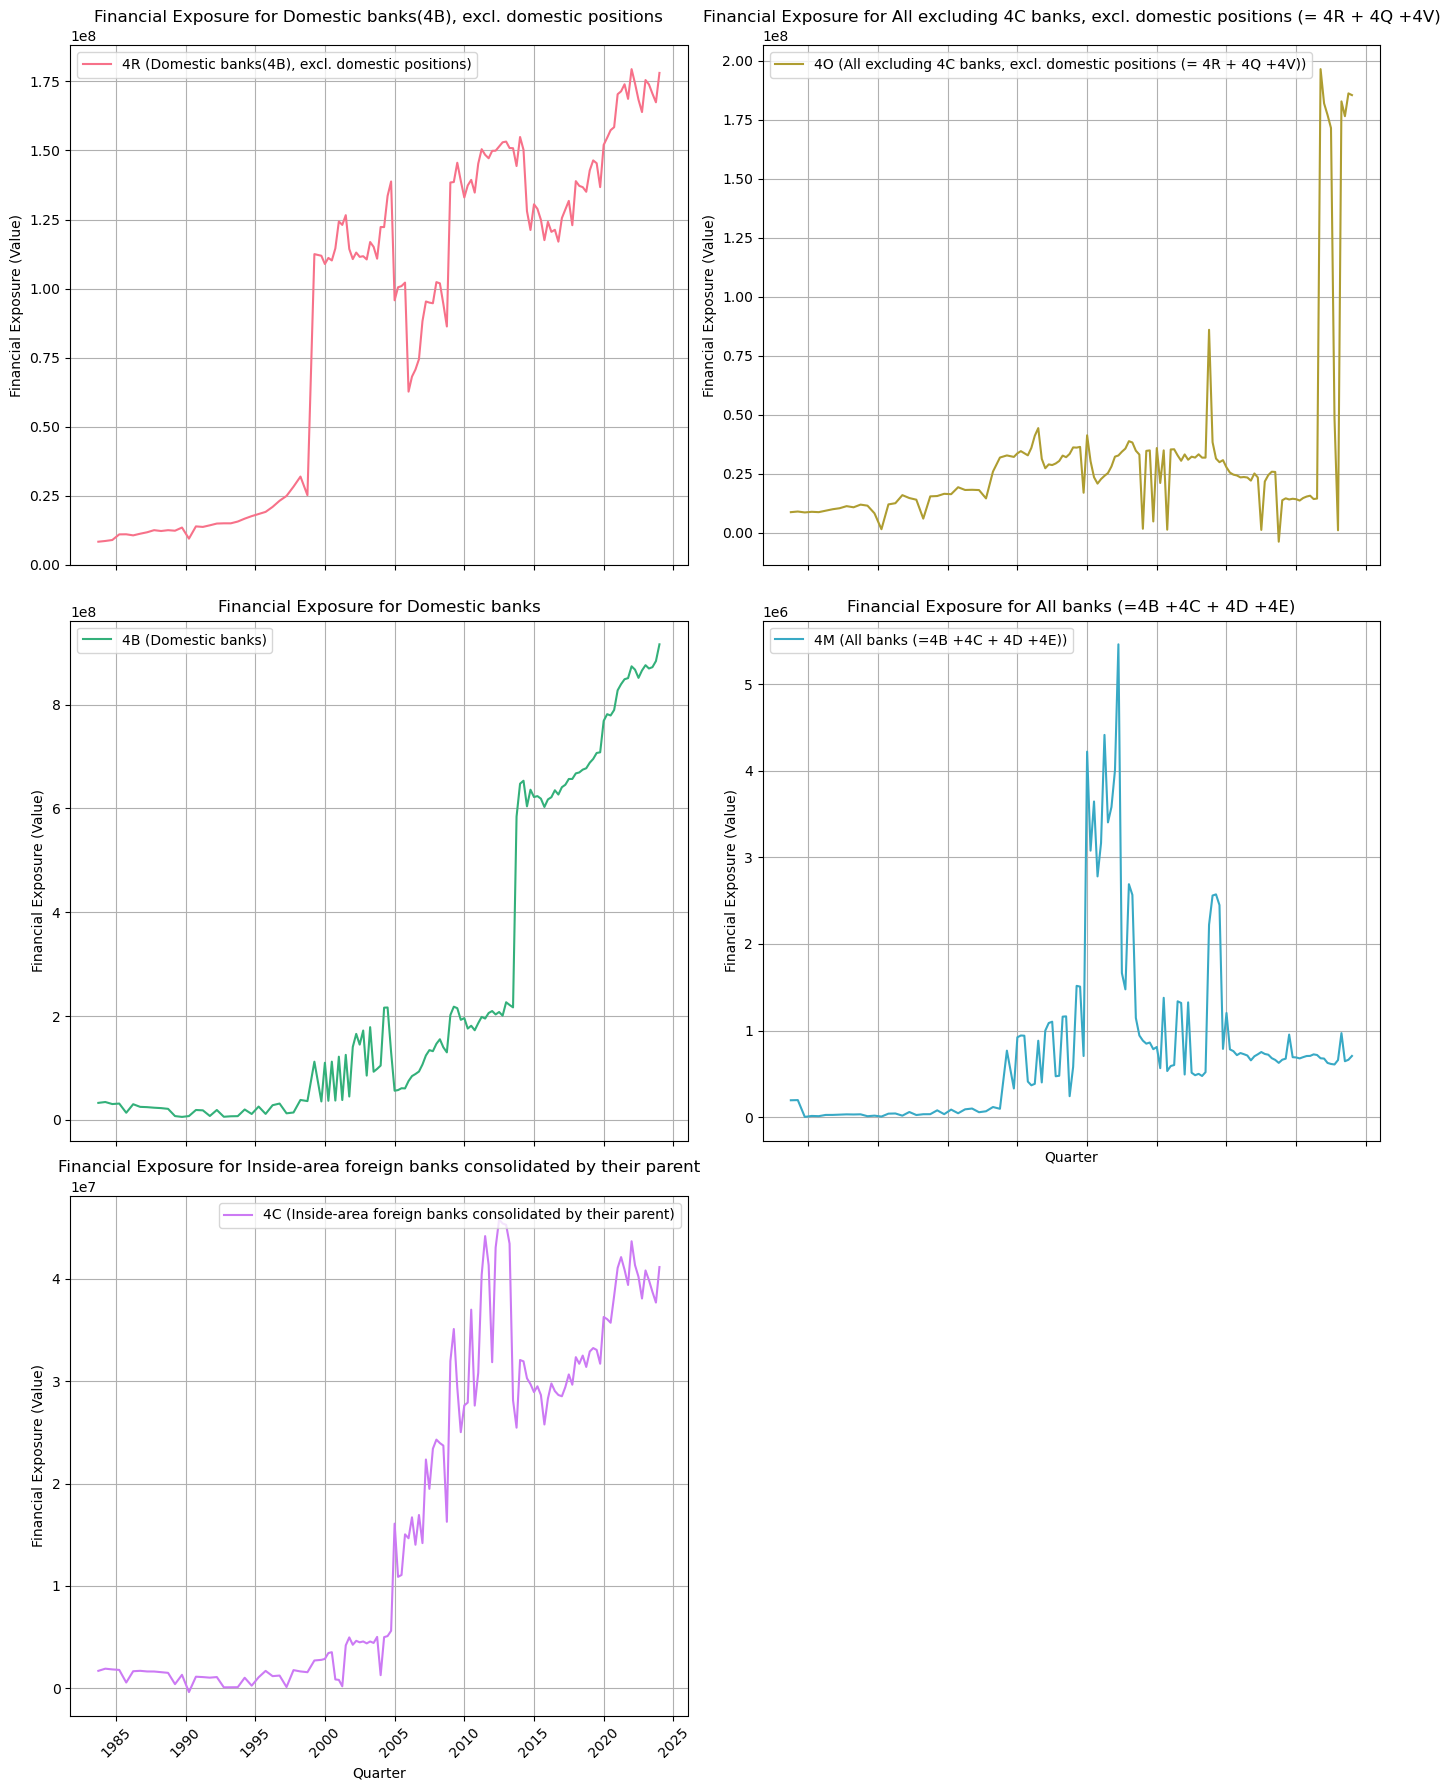

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter data for the United States
usa_data = data_long_clean[data_long_clean['Reporting country'] == 'United States']

# Step 2: Extract unique CBS bank types and their descriptions
unique_bank_types = usa_data[['CBS_BANK_TYPE', 'CBS bank type']].drop_duplicates()
print("Unique CBS Bank Types and Descriptions for United States:")
print(unique_bank_types)

# Set up subplots - 3 rows, 2 columns (for a 3x2 grid)
fig, axes = plt.subplots(3, 2, figsize=(14, 18), sharex=True)

# Define color palette
colors = sns.color_palette("husl", len(unique_bank_types[:5]))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the first 5 unique CBS bank types and plot
for i, (bank_type, bank_type_desc) in enumerate(unique_bank_types[:5].values):
    # Filter data for each bank type
    bank_data = usa_data[usa_data['CBS_BANK_TYPE'] == bank_type]
    
    # Group by 'Quarter' and aggregate the 'Value'
    bank_data_grouped = bank_data.groupby('Quarter')['Value'].sum()
    
    # Plot the time series for each bank type in a separate subplot with different colors
    axes[i].plot(bank_data_grouped.index, bank_data_grouped, label=f'{bank_type} ({bank_type_desc})', color=colors[i])
    
    # Set plot title and labels for each subplot
    axes[i].set_title(f'Financial Exposure for {bank_type_desc}')
    axes[i].set_ylabel('Financial Exposure (Value)')
    axes[i].legend()
    axes[i].grid(True)

# Hide the last unused subplot (6th subplot)
fig.delaxes(axes[5])

# Set x-axis label for the bottom row of subplots
for ax in axes[-3:]:
    ax.set_xlabel('Quarter')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the financial perspective, these plots illustrate the evolution of financial exposure across different types of banks in the United States over time. The key takeaway points include:

1. **Domestic Banks (4B & 4R)**:
   - These banks show a significant and consistent upward trend in financial exposure, particularly starting from around 2008. This is likely driven by increased domestic activities and growth in bank assets, which could be attributed to post-financial-crisis stabilization and subsequent economic growth.
   - The sudden spike in financial exposure, particularly in the `4R (Domestic banks, excl. domestic positions)` category, may represent increased international transactions or foreign investments, reflecting the global expansion of US banks.

2. **All Banks Excluding 4C Banks (4O)**:
   - The financial exposure for all banks excluding `4C banks (Inside-area foreign banks)` shows a volatile but generally increasing pattern. The fluctuations may indicate periods of increased risk exposure to international markets, particularly post-2008, as banks sought to diversify their portfolios and capture opportunities abroad.

3. **Inside-area Foreign Banks Consolidated by Parent (4C)**:
   - The exposure for `4C banks (Inside-area foreign banks)` has steadily increased since 2005, showing peaks around 2008 and continuing upwards into the present. This could be a result of foreign banks consolidating their positions within the US financial system, strengthening their presence post-crisis.

4. **All Banks (4M)**:
   - Financial exposure for all banks shows a sharp rise leading up to the financial crisis of 2008, followed by heightened volatility in the following years. This behavior underscores the increased systemic risk during the crisis, as well as the post-crisis recovery period marked by fluctuations in financial activities.

**Financial Explanation**:
- **Post-2008 Financial Crisis Effects**: The general trend of increasing exposure, particularly after 2008, reflects the global financial markets' recovery after the 2007-2008 financial crisis. US banks significantly increased their exposure internationally as part of their strategy to diversify and stabilize their portfolios.
  
- **Risk Diversification**: The volatile nature of some of the categories (e.g., 4M and 4O) suggests that banks have engaged in higher-risk activities internationally, likely as part of post-crisis recovery strategies. The large fluctuations might also indicate reactions to global economic changes, such as sovereign debt crises or changes in regulatory frameworks.

- **Regulatory and Market Reforms**: After the financial crisis, reforms and regulatory changes likely had an impact on financial exposure. The tightening of domestic regulations may have prompted banks to expand abroad or consolidate their existing international positions.

In conclusion, the data shows a marked recovery and growth in financial exposure across all types of banks, particularly after the 2008 crisis. 

The diversification into international markets is evident, alongside significant growth in domestic financial exposure as the banking system regained confidence and stability.








## Forecasting Financial Exposure for Domestic Banks (4B)


The financial exposure for '4B: Domestic Banks' has been modeled and forecasted using an Exponential Smoothing (Holt-Winters) model with an additive seasonal component. The dataset was filtered specifically for domestic banks, with the 'Quarter' column serving as the time index for the time series analysis. The model was fitted to capture the historical trend and quarterly seasonality present in the data. After fitting the model, a forecast for the next eight quarters was generated, offering insights into the expected future financial exposure. The results were visualized by plotting the observed values, the fitted values from the model, and the forecasted future values, providing a clear picture of how financial exposure is likely to evolve over the coming quarters. This approach effectively captures the seasonal patterns and trends, offering a robust method for short-term financial forecasting.







/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


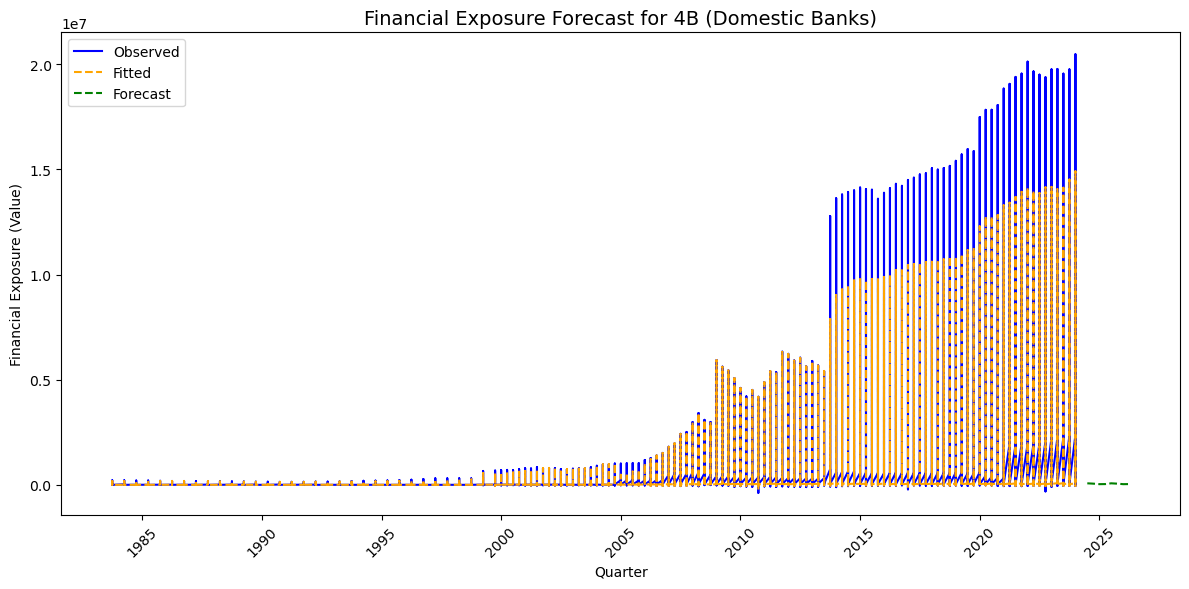

Forecast for the next 8 quarters:
372303    72090.524503
372304    55933.575955
372305    31740.450815
372306    35943.925152
372307    72090.524503
372308    55933.575955
372309    31740.450815
372310    35943.925152
dtype: float64


In [42]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Filter the data for '4B: Domestic Banks'
bank_type = '4B'
bank_data = usa_data[usa_data['CBS_BANK_TYPE'] == bank_type]

# Step 2: Set the 'Quarter' column as the index (for time series)
bank_data = bank_data.set_index('Quarter')
bank_data = bank_data.sort_index()

# Step 3: Fit the Exponential Smoothing model (additive model with seasonality)
# Seasonal_periods=4 assumes quarterly data
model = ExponentialSmoothing(bank_data['Value'], seasonal='add', seasonal_periods=4).fit()

# Step 4: Add fitted values to the data for comparison
bank_data['Fitted'] = model.fittedvalues

# Step 5: Forecasting future periods (next 8 quarters)
forecast_periods = 8
forecast = model.forecast(steps=forecast_periods)

# Step 6: Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(bank_data.index, bank_data['Value'], label='Observed', color='blue')
plt.plot(bank_data.index, bank_data['Fitted'], label='Fitted', linestyle='--', color='orange')

# Adding the forecast to the plot
forecast_index = pd.date_range(start=bank_data.index[-1], periods=forecast_periods+1, freq='Q')[1:]
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='green')

# Setting labels and title
plt.title(f'Financial Exposure Forecast for {bank_type} (Domestic Banks)', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('Financial Exposure (Value)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Step 7: Print Forecasted Values
print(f"Forecast for the next {forecast_periods} quarters:")
print(forecast)


To evaluate the performance and diagnostic aspects of the Exponential Smoothing (ETS) model, we can take the following steps:

### 1. **Model Diagnostics**
   - **Residual Analysis**: Examining the residuals (difference between observed and fitted values) is an important diagnostic tool to check if there is any structure in the residuals. Ideally, residuals should be random with no clear patterns.
   - **Mean Squared Error (MSE)**: Compute the MSE to quantify how well the model has fitted the data.
   - **Autocorrelation of Residuals**: Analyze the autocorrelation in the residuals using the Autocorrelation Function (ACF) plot to check for patterns that may have been missed by the model.

### 2. **Model Fit**
   - **Goodness of Fit**: Plot the observed vs. fitted values to visually assess how closely the model follows the actual data.

### 3. **Forecast Accuracy**
   - **Confidence Intervals**: Evaluate the confidence intervals of the forecasts to assess the uncertainty associated with the predictions.
   - **Comparison of Forecasts and Observations**: When future data becomes available, compare forecasted values against actual observations.


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

# Step 1: Residual Analysis
# Calculate residuals (Observed - Fitted)
bank_data['Residuals'] = bank_data['Value'] - bank_data['Fitted']


/Users/yuyao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


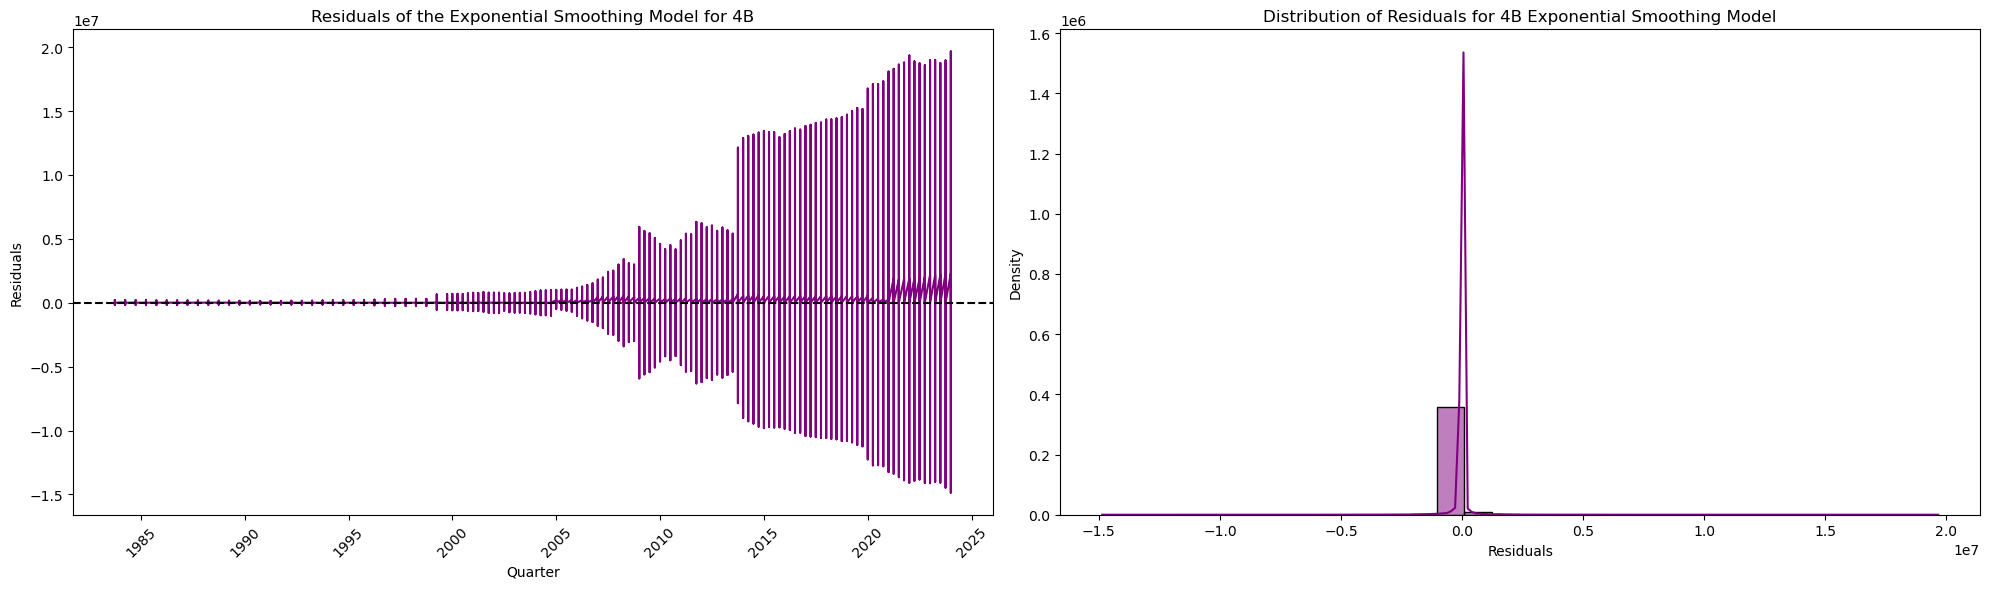

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 2 columns for the subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Step 1: Residuals Plot
axs[0].plot(bank_data.index, bank_data['Residuals'], label='Residuals', color='purple')
axs[0].axhline(0, linestyle='--', color='black')
axs[0].set_title(f'Residuals of the Exponential Smoothing Model for {bank_type}')
axs[0].set_xlabel('Quarter')
axs[0].set_ylabel('Residuals')
axs[0].tick_params(axis='x', rotation=45)

# Step 2: Residual Distribution (Histogram and Density Plot)
sns.histplot(bank_data['Residuals'], kde=True, color='purple', bins=30, ax=axs[1])
axs[1].set_title(f'Distribution of Residuals for {bank_type} Exponential Smoothing Model')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Density')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


The two plots represent the residual diagnostics for the Exponential Smoothing model applied to the 4B dataset. Here's a brief analysis:

1. **Residuals Over Time (Left Plot):**
   - The residuals appear relatively close to zero until around 2000, after which there is a significant increase in both the magnitude and variance of the residuals. This indicates that the model struggles to capture the dynamics of the data after this point, potentially due to structural changes or increased volatility in the underlying financial exposure data.
   - The increasing spread in residuals (heteroscedasticity) suggests that the model may be missing important elements, such as varying volatility or changes in trend over time.

2. **Residual Distribution (Right Plot):**
   - The distribution is heavily skewed toward zero, with a sharp peak around the center, indicating that most residuals are small.
   - However, there are some extreme residuals on both sides, reflecting the increased volatility and model error seen in recent years.
   - This skewed and peaked distribution suggests that the model is not adequately accounting for all aspects of the data's complexity, especially in later years.



Mean Squared Error (MSE) for 4B: 432834424743.24


<Figure size 1000x600 with 0 Axes>

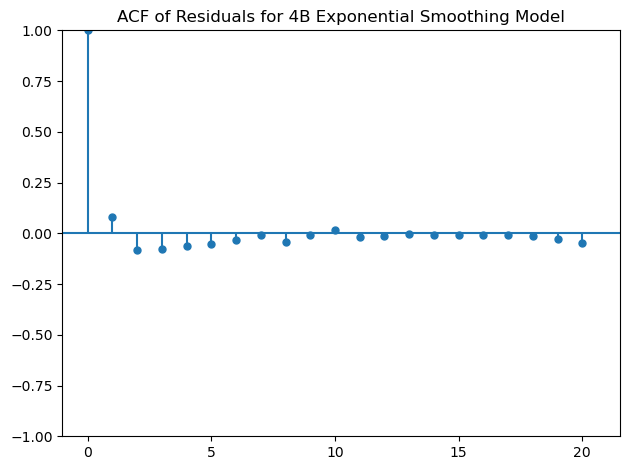

In [45]:

# Step 3: Mean Squared Error (MSE)
mse = np.mean(np.square(bank_data['Residuals']))
print(f'Mean Squared Error (MSE) for {bank_type}: {mse:.2f}')

# Step 4: Autocorrelation of Residuals
plt.figure(figsize=(10, 6))
plot_acf(bank_data['Residuals'].dropna(), lags=20)
plt.title(f'ACF of Residuals for {bank_type} Exponential Smoothing Model')
plt.tight_layout()
plt.show()


### ACF of Residuals Analysis:

1. **Lag-0 Correlation:** The ACF at lag 0 is 1, as expected since a series is perfectly correlated with itself at lag 0.

2. **Low Correlation at Higher Lags:** Residuals beyond lag 1 have very low autocorrelations, indicating little correlation between residuals at different time lags.

3. **White Noise Pattern:** The near-zero autocorrelations suggest that the residuals resemble white noise, meaning the model has captured the main trends and seasonality in the data.

4. **Model Performance:** The lack of significant autocorrelation indicates the Exponential Smoothing model fits reasonably well, leaving little predictable structure in the residuals. However, the model might still be underestimating long-term trends or volatility, as suggested by the large spread in residuals seen in previous plots.


The residual plot indicates poor model performance, especially toward the more recent periods (post-2010). The residuals display increasing variability over time, suggesting that the model is unable to capture the dynamics of the data accurately, especially in the later stages. 

/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_11201/2877378053.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data_recent['HW_Fit'] = hw_model_recent.fittedvalues


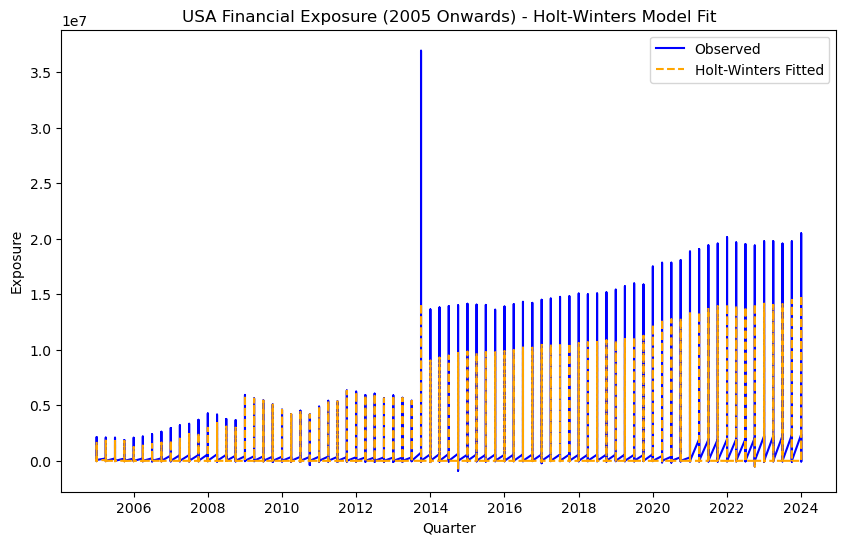

/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_11201/2877378053.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data_recent['Residuals'] = usa_data_recent['Value'] - usa_data_recent['HW_Fit']


In [46]:
# Filter the data to include only data from 2005 onwards
usa_data_recent = usa_data[usa_data['Quarter'] >= '2005-01-01']

# Fit Holt-Winters Exponential Smoothing model on the filtered data
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
hw_model_recent = ExponentialSmoothing(usa_data_recent['Value'], seasonal='add', seasonal_periods=4).fit()

# Add fitted values to the recent data
usa_data_recent['HW_Fit'] = hw_model_recent.fittedvalues

# Plot the observed vs fitted data for the recent period (2005 onwards)
plt.figure(figsize=(10, 6))
plt.plot(usa_data_recent['Quarter'], usa_data_recent['Value'], label='Observed', color='blue')
plt.plot(usa_data_recent['Quarter'], usa_data_recent['HW_Fit'], label='Holt-Winters Fitted', linestyle='--', color='orange')
plt.title('USA Financial Exposure (2005 Onwards) - Holt-Winters Model Fit')
plt.xlabel('Quarter')
plt.ylabel('Exposure')
plt.legend()
plt.show()

# Calculate residuals for diagnostics
usa_data_recent['Residuals'] = usa_data_recent['Value'] - usa_data_recent['HW_Fit']



### Analysis of the Holt-Winters Model Results:

1. **Model Fit Observation:**
   - The **Holt-Winters Model** fitted values (orange) closely follow the observed financial exposure (blue) until around 2014. After this point, there is a significant spike in the observed data that the model is unable to capture accurately. The model seems to struggle with sudden volatility, which could be due to its smoothing nature and inability to adapt to such rapid changes.

2. **Residual Analysis:**
   - The **residual plot** shows relatively stable residuals before 2014, suggesting that the model performs reasonably well for that period. However, after 2014, the residuals show increasing variance, indicating that the model struggles to explain the variability in the data. This is especially noticeable around the large spike, where the residuals deviate significantly from zero.

3. **Heteroscedasticity:**
   - The residuals exhibit **heteroscedasticity**, meaning the variance increases over time. This indicates that the model assumptions of constant variance are violated, which could lead to unreliable predictions, particularly for periods of higher variance.


/Users/yuyao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


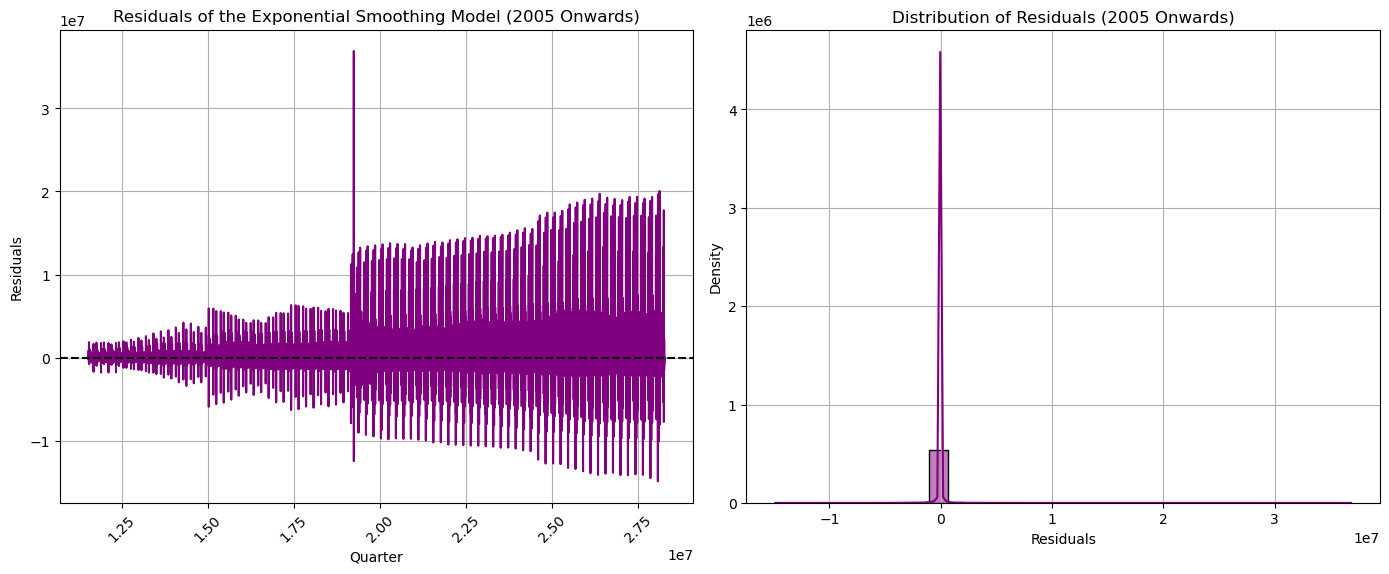

In [47]:
# Set up the 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the residuals over time in the first subplot
axes[0].plot(usa_data_recent.index, usa_data_recent['Residuals'], label='Residuals', color='purple')
axes[0].axhline(0, linestyle='--', color='black')
axes[0].set_title('Residuals of the Exponential Smoothing Model (2005 Onwards)')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Residuals')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# Plot the residuals' distribution in the second subplot
sns.histplot(usa_data_recent['Residuals'], kde=True, color='purple', bins=30, ax=axes[1])
axes[1].set_title('Distribution of Residuals (2005 Onwards)')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Density')
axes[1].grid(True)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Show the combined plot
plt.show()


### Analysis of Residuals from the Exponential Smoothing Model (2015 Onwards)

#### 1. **Residuals Plot (Left Panel):**
   - **Pattern Observation:** The residuals show a distinct pattern with increasing variance over time, particularly after 2017. This indicates that the model does not fully capture the underlying dynamics of the data, especially in the latter part of the series.
   - **Structural Break:** The sharp spike observed around 2017 may suggest a structural break or an outlier event that the model is unable to account for effectively.
   - **Model Fit:** The residuals should ideally hover around zero without displaying a trend or pattern. However, the widening bands of residuals imply that the model's accuracy decreases over time, indicating a poor fit for the later periods.

#### 2. **Distribution of Residuals (Right Panel):**
   - **Distribution Shape:** The residuals are highly concentrated around zero, with very little spread. This suggests that the model often predicts values very close to the actual observations.
   - **Outliers:** Despite the concentration near zero, the presence of long tails in the distribution, particularly on the positive side, indicates potential outliers or periods where the model severely underestimates the actual values.
   - **Skewness:** The residuals appear to be slightly skewed, which may suggest that the model consistently underestimates or overestimates the financial exposure in certain periods.

### Conclusion:
The Exponential Smoothing model applied to the data from 2015 onwards shows limitations in accurately capturing the underlying financial exposure trends. The increasing residual variance, the presence of outliers, and the pattern in residuals suggest that the model is not fully adequate for forecasting this time series. 


## Further Improvement



In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 1: Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(usa_data_recent[['Value']].values)

# Step 2: Prepare the data for LSTM (training and testing split)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 4  # Quarterly data
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshape the input to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], time_step, 1)
X_test = X_test.reshape(X_test.shape[0], time_step, 1)

# Step 3: Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=64, epochs=50)


Epoch 1/50


/Users/yuyao/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3267/3267 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0014
Epoch 2/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0012
Epoch 3/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0011
Epoch 4/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0012
Epoch 5/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0011
Epoch 6/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0011
Epoch 7/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0011
Epoch 8/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0011
Epoch 9/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0010
Epoch 10/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0011
Epoch 11/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0011
Epoch 12/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 9.9491e-04
Epoch 13/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0010
Epoch 14/50
3267/3267 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0010
Epoch 15/50
3267/3267 ━━━━━━━━━━━━━

In [58]:

# Step 4: Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


6534/6534 ━━━━━━━━━━━━━━━━━━━━ 4s 638us/step
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step


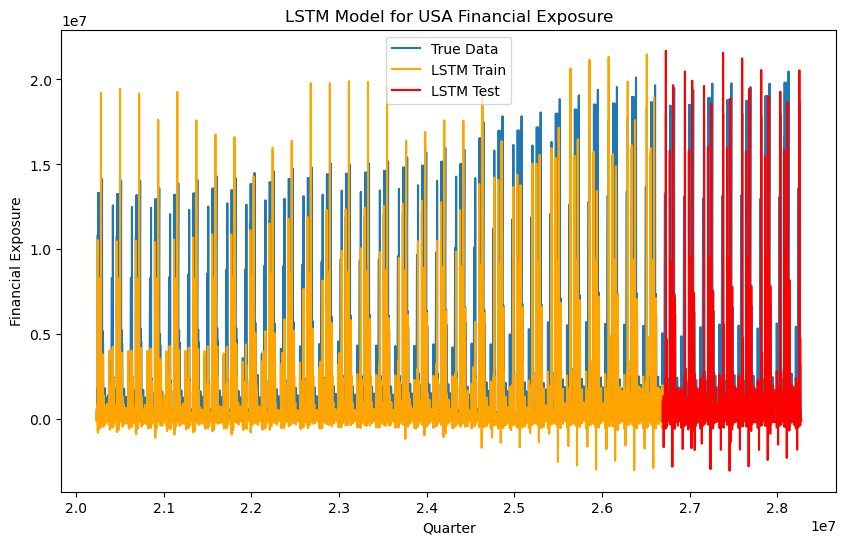

In [59]:

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(usa_data_recent.index, scaler.inverse_transform(scaled_data), label='True Data')
plt.plot(usa_data_recent.index[:len(train_predict)], train_predict, label='LSTM Train', color='orange')
plt.plot(usa_data_recent.index[len(train_predict):len(train_predict)+len(test_predict)], test_predict, label='LSTM Test', color='red')
plt.title('LSTM Model for USA Financial Exposure')
plt.xlabel('Quarter')
plt.ylabel('Financial Exposure')
plt.legend()
plt.show()


### Analysis of LSTM Model for USA Financial Exposure

The plot depicts the performance of an LSTM model in forecasting USA financial exposure using historical time series data. The following is a breakdown of the plot's components and observations:

#### **1. True Data (Blue Line):**
   - The blue line represents the actual values of the USA financial exposure over time. It shows seasonal fluctuations that seem to follow a quarterly pattern. Financial exposure rises and falls periodically, indicating underlying cyclical behavior in the data.

#### **2. LSTM Train Predictions (Orange Line):**
   - The orange line represents the LSTM model’s fitted values during the training period. While the model captures some of the cyclical patterns, it appears to struggle with high volatility in the financial exposure. The orange line is often misaligned with the true data, particularly during periods of sharp increase or decrease, indicating that the model may not fully capture the complexity of the cyclical patterns.

#### **3. LSTM Test Predictions (Red Line):**
   - The red line represents the LSTM model’s predictions on the test data. The model’s predictions during this phase show noticeable deviations from the true data. This deviation suggests the model may be overfitting to the training data, as it fails to generalize well on unseen data. The red line continues the general cyclical pattern, but significant differences remain, especially in periods of high volatility.

#### **Key Observations:**
   - **Volatility:** The LSTM model struggles to fully capture the scale of the financial exposure, particularly during periods of high volatility. This can be observed from the over- and under-shooting of the model predictions, especially in the test phase.
   - **Seasonality:** Although the LSTM model attempts to learn seasonal patterns, the results show that the model is not fully able to synchronize with the true peaks and troughs of the data, suggesting that additional tuning or more complex architectures might be needed to better capture seasonal trends.
   - **Overfitting:** The model's performance in the training phase seems better aligned than in the test phase, a potential indicator of overfitting, where the model performs well on the training data but poorly on new, unseen data.
